In [12]:
import sys
if '..' not in sys.path:
    sys.path.append('..')
    
import unet
import utils

from pathlib import Path
import numpy as np
import gzip
import matplotlib.pyplot as plt
import cv2
from skimage.feature import blob_log
%matplotlib inline

In [2]:
load_pred = utils.load_pred

def show(x, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(x)

In [4]:
pred = load_pred('../runs/unet-stratified-scale-0.8-1.6-oversample0.2/pred-train-more/101-1.10769-pred.npy')
img = utils.load_image(Path('../data/Train/101.jpg'.format(101)), cache=False)

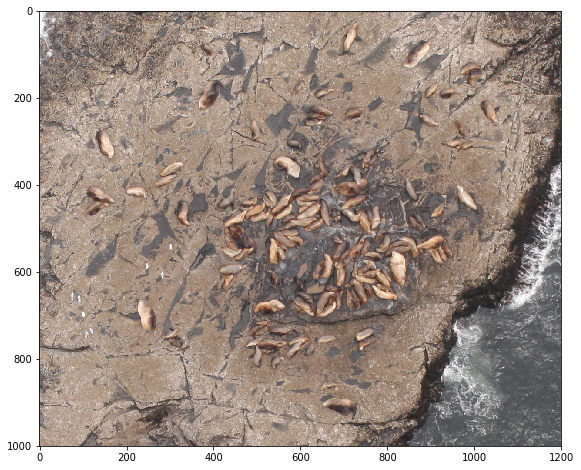

In [9]:
show(img[1000:2000,2300:3500])

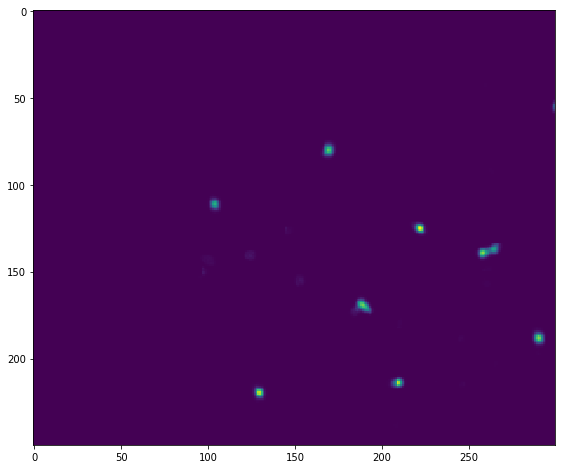

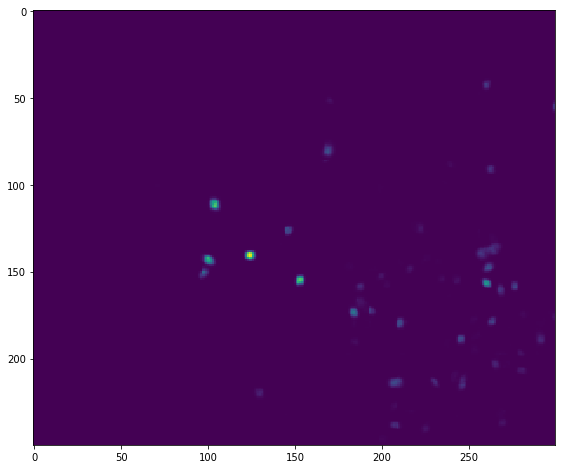

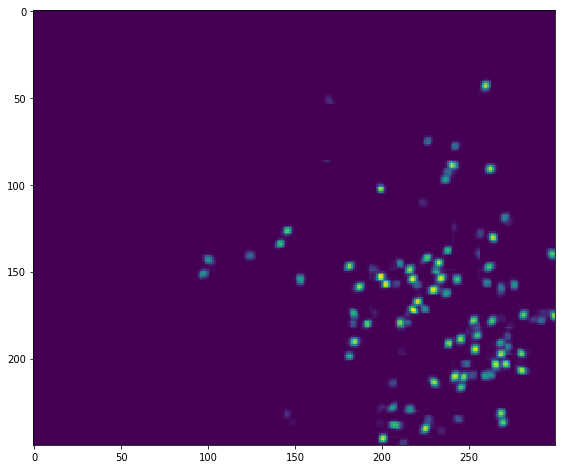

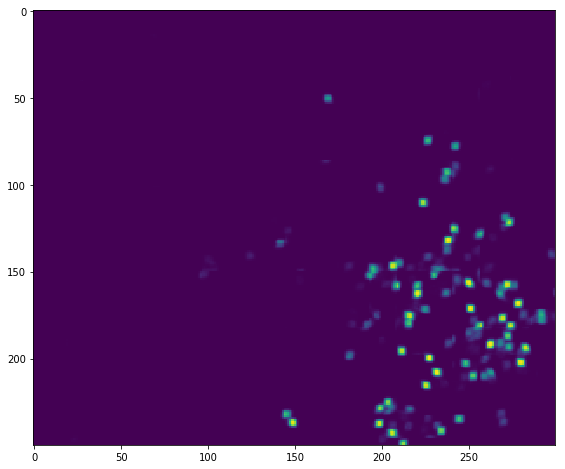

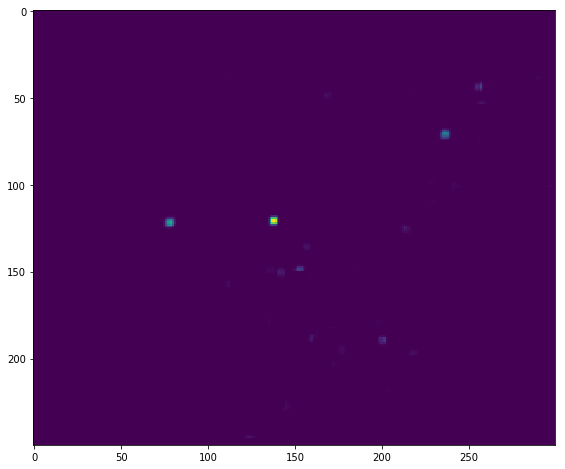

In [14]:
pred_patch = pred[:, 1000//4:2000//4,2300//4:3500//4]
for cls in range(utils.N_CLASSES):
    show(pred_patch[cls])

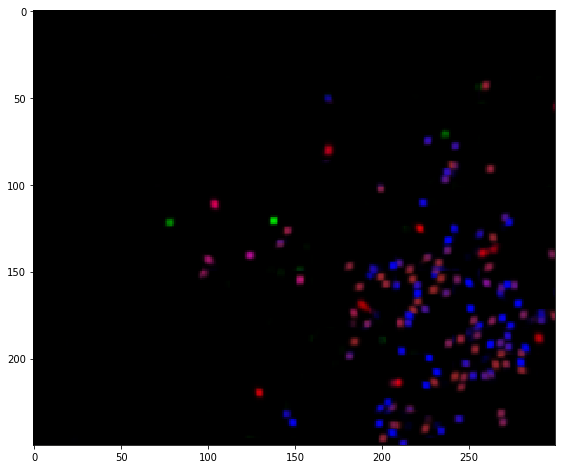

In [13]:
colored_pred = unet.colored_prediction(pred)
colored_patch = colored_pred[1000//4:2000//4,2300//4:3500//4]
show(colored_patch)

In [21]:
def show_blobs(bg, blobs, s=1, scale=1):
    bg = bg.copy()
    for y, x, _ in blobs:
        x, y = int(np.round(x * scale)), int(np.round(y * scale))
        bg[y - s: y + s, x - s: x + s] = 1
    show(bg)

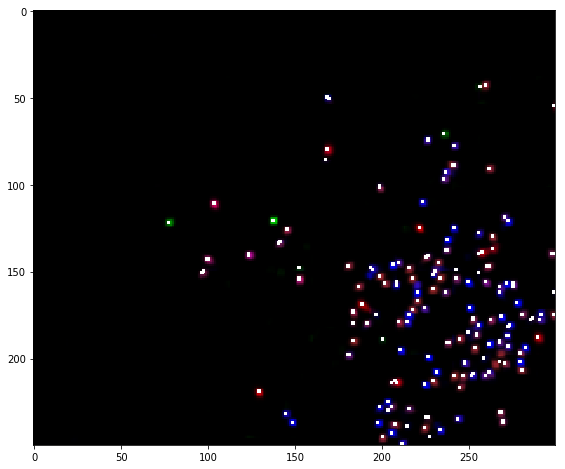

In [22]:
cls_blobs = [
    blob_log(pred_patch[cls], threshold=0.04, min_sigma=1, max_sigma=4, num_sigma=4)
    for cls in range(utils.N_CLASSES)]
show_blobs(colored_patch, [b for bs in cls_blobs for b in bs])

In [36]:
from matplotlib import pyplot as plt
probs = [0.1, 0.4, 0.5, 0.01]
CLS_NAMES = ['male', 'sub_male', 'female', 'juv']
xs = range(len(CLS_NAMES))
barlist = plt.bar(xs, probs)
barlist[1].set_color('r')
plt.ylim(0, 1)
plt.xticks(xs, CLS_NAMES);

AttributeError: 'Figure' object has no attribute 'bar'

In [ ]:
pd.Dat